# Find pattern in picture

Find a pattern provided as picture in a larger picture using OpenCV https://opencv.org . The OpenCV Python API can be installed using conda https://anaconda.org/conda-forge/opencv of PIP https://pypi.org/project/opencv-python/ 

In the example here we search for a two-letter pattern in a scanned newspaper page. The example newspaper page can be downloaded from https://digital.tessmann.it/tessmannDigital/Zeitungsarchiv/Seite/Zeitung/2/1/04.11.1842/19570/4 as a png-image and copied into the working directory. 

Package installation:

    conda install opencv -c conda-forge
    conda install imutils -c conda-forge

#### Required imports

In [1]:
# general tools
import os, sys
import numpy as np

In [2]:
#OpenCV
import cv2

In [3]:
from IPython.display import Image

In [4]:
import matplotlib.pyplot as plt

In [5]:
import imutils

## Pattern template and image 

First we read the template pattern we search for as a .png file. We will search for the pattern in a second image defined as infile, also in png format.

In [6]:
#filename of pattern template
template_img = 'nr.png'

In [7]:
# display template
Image(filename=template_img) 

In [8]:
#filename of  file where to search pattern
infile = 'BZZ_1842_11_04_4_object_460996.png'

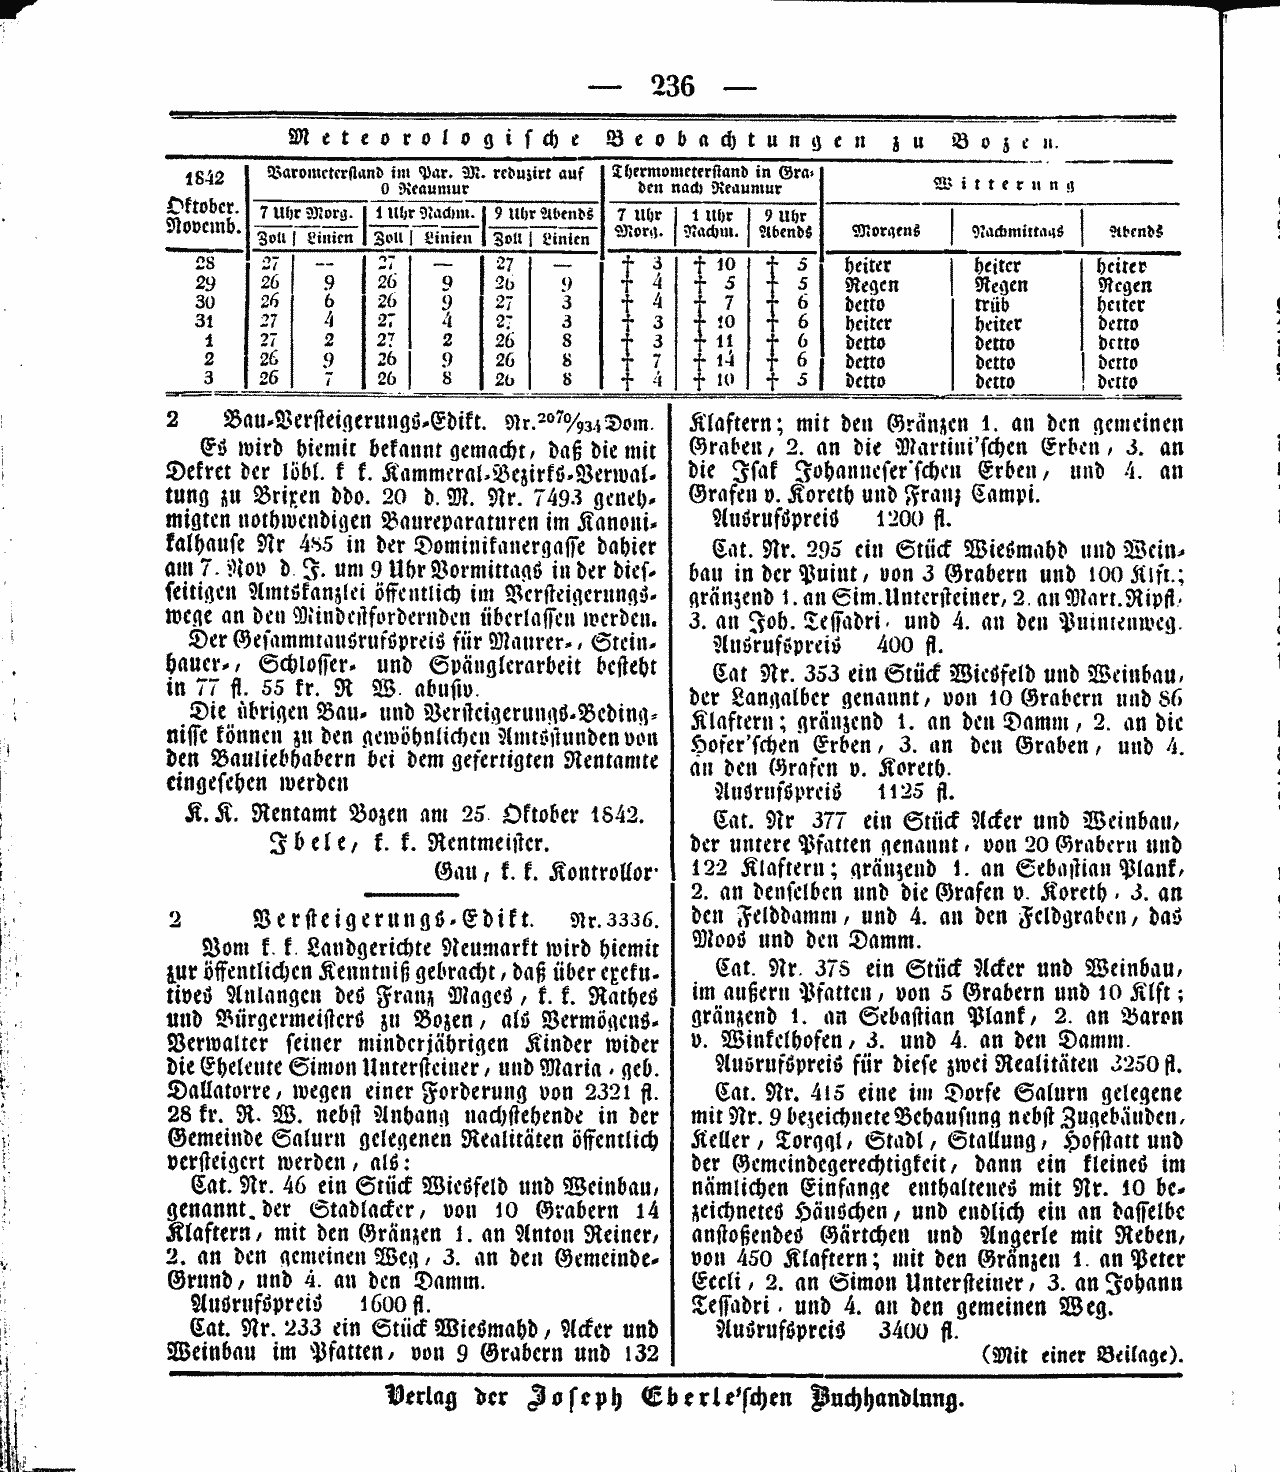

In [9]:
# display file
Image(filename=infile) 

## Template pattern matching with OpenCV

Now we use OpenCV for pattern matching. A description of the corresponding function can be found here: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html

In [10]:
# read files into opencv
img_rgb = cv2.imread(infile,1)
template = cv2.imread(template_img,1)

In [11]:
# print image shape and store width and hight into parameters
print(img_rgb.shape)
print(template.shape)
w, h = template.shape[:-1]   # get template shape

(1472, 1280, 3)
(24, 38, 3)


In [12]:
# use OpenCV template matching 
res = cv2.matchTemplate(img_rgb, template, cv2.TM_CCOEFF_NORMED)

In [13]:
# set a threshold for the quality of the matches in order to select results above threshold
threshold = 0.80
loc = np.where(res >= threshold)

In [14]:
# prepare visualization
for pt in zip(*loc[::-1]):  # Switch columns and rows
    cv2.rectangle(img_rgb, pt, (pt[0] + h, pt[1] + w), (0, 0, 255), 2)

In [15]:
# visualization: Create picture with results outlined in red 
result_name = 'result.png'
cv2.imwrite(result_name, img_rgb)

True

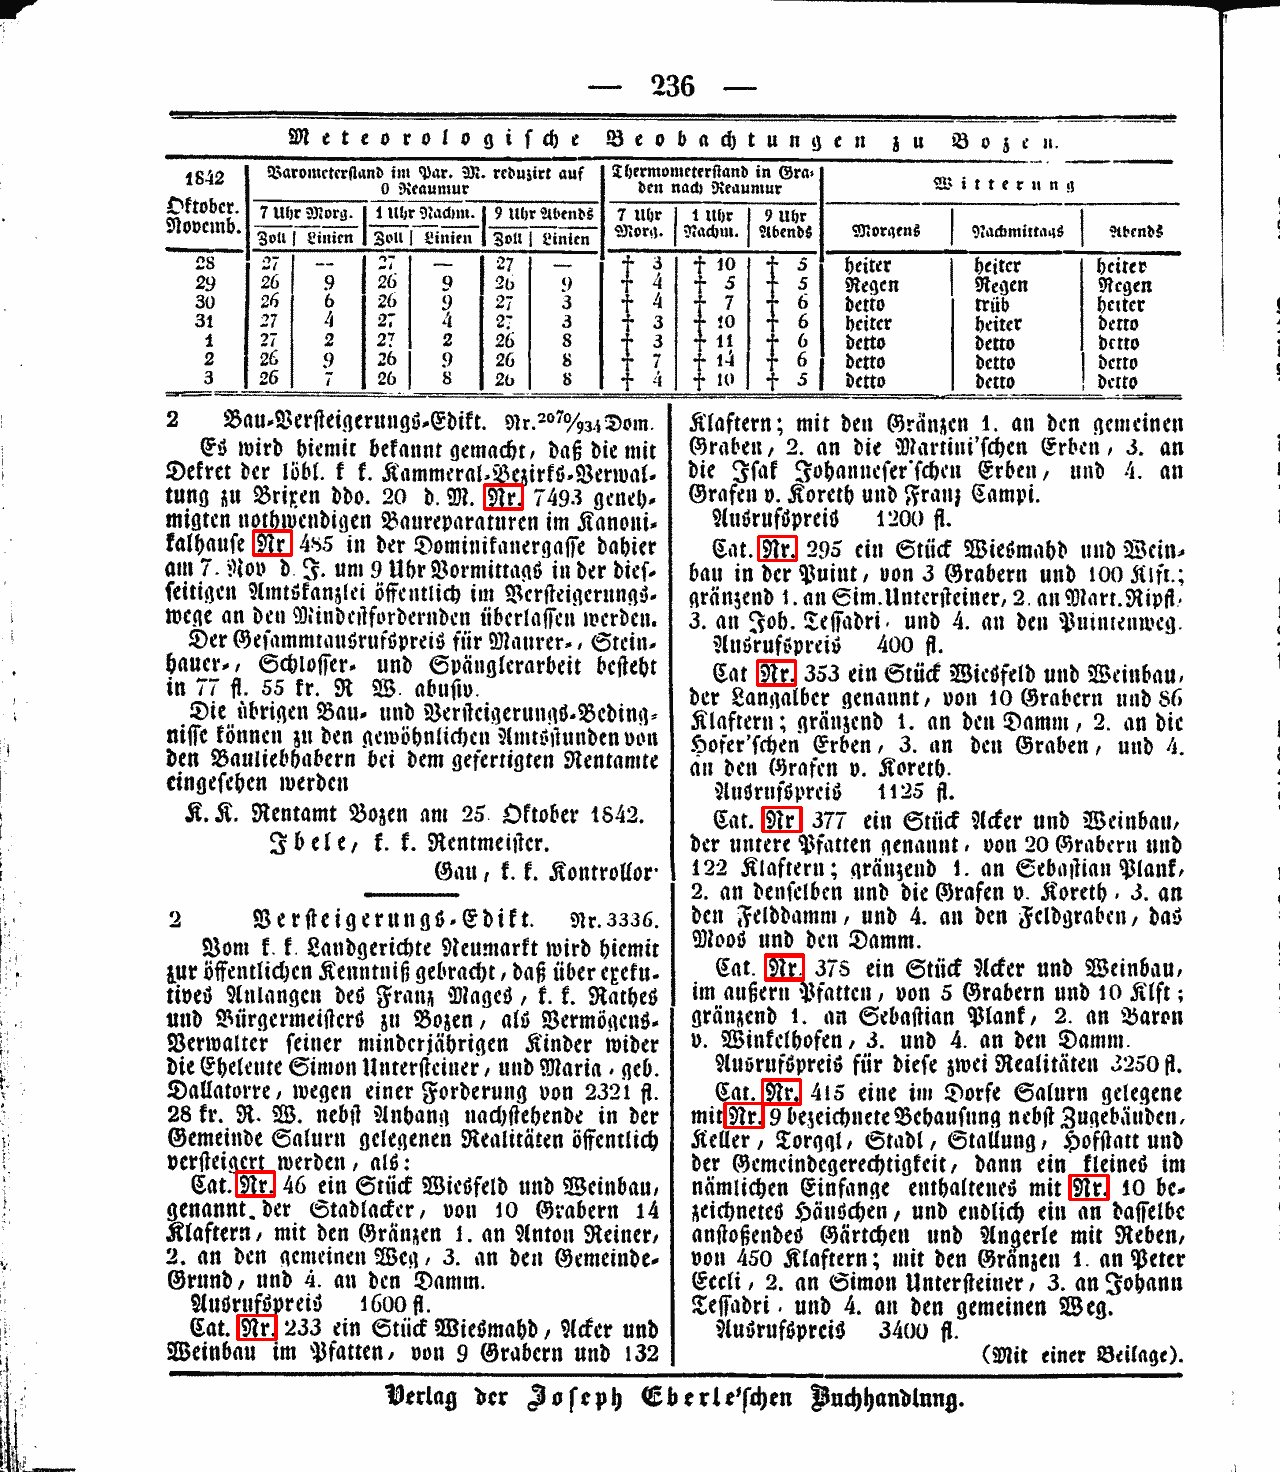

In [16]:
Image(filename=result_name) 